# 1.usa.gov data from bit.ly

In 2011, URL shortening service bit.ly partnered with the United States government website usa.gov to provide a feed of anonymous data gathered from users who shorten links ending with .gov or .mil. As of this writing, in addition to providing a live feed, hourly snapshots are available as downloadable text files.

In [1]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import simplejson
import urllib

In [2]:
bitlnk = "pydata-book/ch02/usagov_bitly_data2012-03-16-1331923249.txt"
bitlinks = os.path.join(os.getcwd(), bitlnk)

open(bitlinks).readline()

# Check one record (line) from the file and see the (dict) format.
try:
    with open(bitlinks, 'r') as fp:
        links = simplejson.loads(fp.readline())
#         print(links)
except Exception as xcpt:
    raise ("Error! Cannot open file. %s " %xcpt)



# Read all data (dict) records and convert each line to JSON format.
try:
    with open(bitlinks, 'r') as fp:
        records = [simplejson.loads(rec) for rec in fp]
except Exception as xcpt:
    raise ("Error! Cannot open file. %s " %xcpt)

# Check records
print("\n... \n\nLength of records is %s. \nSample record:" %len(records))

records[0]


... 

Length of records is 3560. 
Sample record:


{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'al': 'en-US,en;q=0.8',
 'c': 'US',
 'cy': 'Danvers',
 'g': 'A6qOVH',
 'gr': 'MA',
 'h': 'wfLQtf',
 'hc': 1331822918,
 'hh': '1.usa.gov',
 'l': 'orofrog',
 'll': [42.576698, -70.954903],
 'nk': 1,
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 't': 1331923247,
 'tz': 'America/New_York',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

### Extract the URLs for the 1st few records 

In [3]:
# Records extract for the first 10 works well but ...
first_ten = [rec['u'] for rec in records[:10]]

print("\n\n First 10 URLs in records: \n")
first_ten



 First 10 URLs in records: 



['http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 'http://www.monroecounty.gov/etc/911/rss.php',
 'http://boxer.senate.gov/en/press/releases/031612.cfm',
 'http://apod.nasa.gov/apod/ap120312.html',
 'http://www.shrewsbury-ma.gov/egov/gallery/134127368672998.png',
 'http://www.shrewsbury-ma.gov/egov/gallery/134127368675393.png',
 'http://www.nasa.gov/mission_pages/nustar/main/index.html',
 'http://www.nasa.gov/mission_pages/nustar/main/index.html',
 'http://www.nasa.gov/mission_pages/nustar/main/index.html',
 'http://apod.nasa.gov/apod/ap120312.html']

### some URL missing may create problems down the line during extraction

In [4]:
# Records extract for the first 10 works well but ...
all_url = [rec['u'] for rec in records]

print("\n\n Some URL missing may create errors: \n")
all_url

KeyError: 'u'

### Insert a condition to skip over records with missing TimeZones entry


In [5]:
# Records extract for the first 10 works well but ...
all_timezones = [rec['tz'] for rec in records if 'tz' in rec ]

print("\n\n Now we can extract all Timezones: \n")
all_timezones[:20]



 Now we can extract all Timezones: 



['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '',
 'America/Los_Angeles',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'Asia/Hong_Kong',
 'Asia/Hong_Kong',
 'America/New_York',
 'America/Denver',
 'Europe/Rome',
 'Africa/Ceuta']

### Count and Print TOP 20 time zones in the records

In [6]:
from collections import Counter

# count the time zones present in the record and print according to DESC
timezone_counts = Counter(all_timezones)

timezone_counts.most_common(20)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33),
 ('Europe/Berlin', 28),
 ('Europe/Rome', 27),
 ('America/Rainy_River', 25),
 ('Europe/Amsterdam', 22),
 ('America/Phoenix', 20),
 ('America/Indianapolis', 20),
 ('Europe/Warsaw', 16),
 ('America/Mexico_City', 15),
 ('Europe/Paris', 14),
 ('Europe/Stockholm', 14)]

#### Count and Print time zones in the records - using PANDAS Package

In [40]:
# Use Pandas dataframe to capture and store the data for manipulations.
df_records = pd.DataFrame(records)

df_records

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1331822918,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1331923247,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1308262393,j.mp,NaN,bitly,"[40.218102, -111.613297]",0,http://www.AwareMap.com/,1331923249,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1331919941,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1,http://t.co/03elZC4Q,1331923250,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1331923068,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0,direct,1331923249,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1273672411,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0,http://www.shrewsbury-ma.gov/selco/,1331923251,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
5,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,axNK8c,MA,axNK8c,1273672506,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0,http://www.shrewsbury-ma.gov/selco/,1331923252,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
6,NaN,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,"pl-PL,pl;q=0.8,en-US;q=0.6,en;q=0.4",PL,Luban,wcndER,77,zkpJBR,1331922854,1.usa.gov,NaN,bnjacobs,"[51.116699, 15.2833]",0,http://plus.url.google.com/url?sa=z&n=13319232...,1331923255,Europe/Warsaw,http://www.nasa.gov/mission_pages/nustar/main/...
7,NaN,Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...,"bg,en-us;q=0.7,en;q=0.3",None,NaN,wcndER,NaN,zkpJBR,1331922854,1.usa.gov,NaN,bnjacobs,NaN,0,http://www.facebook.com/,1331923255,,http://www.nasa.gov/mission_pages/nustar/main/...
8,NaN,Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...,"en-US, en",None,NaN,wcndER,NaN,zkpJBR,1331922854,1.usa.gov,NaN,bnjacobs,NaN,0,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,1331923254,,http://www.nasa.gov/mission_pages/nustar/main/...
9,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"pt-BR,pt;q=0.8,en-US;q=0.6,en;q=0.4",None,NaN,zCaLwp,NaN,zUtuOu,1331923068,1.usa.gov,NaN,alelex88,NaN,0,http://t.co/o1Pd0WeV,1331923255,,http://apod.nasa.gov/apod/ap120312.html


### Using Pandas dataframe, no need to set loops

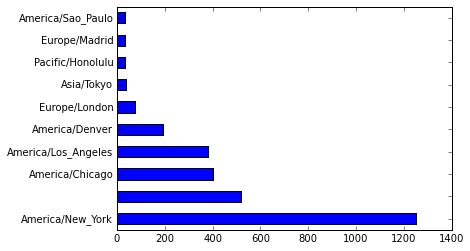

In [49]:
tz_counts = df_records['tz'].value_counts()

tz_counts[:20]

tz_counts[:10].plot(kind='barh', rot=0)

### Data Munging, cleaning and Plotting 

We do some data munging to fill in substitute "Mising" to replace the mising values and unknown (empty strings) can be replaced by boolean array indexing.

America/New_York       11
Unknown                 5
America/Denver          2
Asia/Hong_Kong          2
America/Sao_Paulo       2
Asia/Kuala_Lumpur       1
Europe/Rome             1
Europe/Madrid           1
America/Los_Angeles     1
Europe/Warsaw           1
Africa/Ceuta            1
Asia/Nicosia            1
Missing                 1
dtype: int64


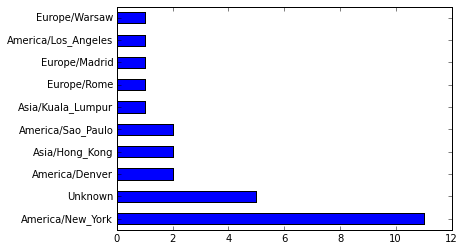

In [48]:
tz_clean = frame['tz'].fillna('Missing')
tz_clean[tz_clean == ''] = 'Unknown'

tz_counts = tz_clean[:30].value_counts()

print(tz_counts)

tz_counts[:10].plot(kind='barh', rot=0)

#### Now we try to extract the operating systems and group them into "Windows" or "Non-Windows" then plot the result on a stacked bar-graph

                                Not Windows  Windows
tz                                                  
                                        245      276
Africa/Cairo                              0        3
Africa/Casablanca                         0        1
Africa/Ceuta                              0        2
Africa/Johannesburg                       0        1
Africa/Lusaka                             0        1
America/Anchorage                         4        1
America/Argentina/Buenos_Aires            1        0
America/Argentina/Cordoba                 0        1
America/Argentina/Mendoza                 0        1
                     Not Windows  Windows
tz                                       
America/Sao_Paulo             13       20
Europe/Madrid                 16       19
Pacific/Honolulu               0       36
Asia/Tokyo                     2       35
Europe/London                 43       31
America/Denver               132       59
America/Los_Angeles         

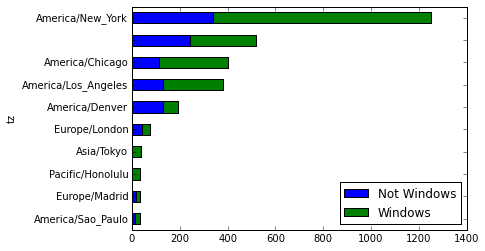

In [55]:
cframe = df_records[df_records.a.notnull()]

operating_systems = np.where(cframe['a'].str.contains('Windows'), 
                             'Windows','Not Windows')

# Print out the groupings
#print operating_systems[:6]
by_tz_os = cframe.groupby(['tz', operating_systems])


# Calssify the grouping by time zone and print
agg_counts = by_tz_os.size().unstack().fillna(0)
print(agg_counts[:10])

# We select the top overall time zones.
indexer = agg_counts.sum(1).argsort()

count_subset = agg_counts.take(indexer)[-10:]
print;  print(count_subset)
count_subset.plot(kind='barh', stacked=True)

### Normalize the plot to see the percentage of "Windows" to "Non-Windows"


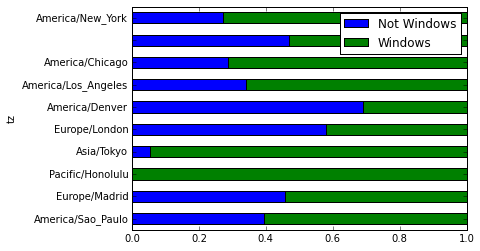

In [54]:
normed_subset = count_subset.div(count_subset.sum(1), axis=0)

normed_subset.plot(kind='barh', stacked=True)